In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df   = pd.read_csv("file")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop(columns = ["SibSp","Parch","Ticket","Cabin","Name"])
df
    

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S
887,888,1,1,female,19.0,30.0000,S
888,889,0,3,female,NaN,23.4500,S
889,890,1,1,male,26.0,30.0000,C


In [4]:
from sklearn.preprocessing import LabelEncoder
sex= LabelEncoder()
df["Sex"]=sex.fit_transform(df["Sex"])

In [5]:
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [6]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,S
1,2,1,1,0,38.0,71.2833,C
2,3,1,3,0,26.0,7.9250,S
3,4,1,1,0,35.0,53.1000,S
4,5,0,3,1,35.0,8.0500,S
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,S
887,888,1,1,0,19.0,30.0000,S
888,889,0,3,0,NaN,23.4500,S
889,890,1,1,1,26.0,30.0000,C


In [7]:
dumy  = df["Embarked"]
df["Embarked"] = pd.get_dummies(dumy)


In [8]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,0
1,2,1,1,0,38.0,71.2833,1
2,3,1,3,0,26.0,7.9250,0
3,4,1,1,0,35.0,53.1000,0
4,5,0,3,1,35.0,8.0500,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,0
887,888,1,1,0,19.0,30.0000,0
888,889,0,3,0,NaN,23.4500,0
889,890,1,1,1,26.0,30.0000,1


In [9]:
df[pd.isnull(df["Age"])]
df["Age"].fillna(23, inplace=True)


In [10]:
x  = df.loc[:,["Pclass","Sex","Embarked"]].values
y = df.loc[:,["Survived"]].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=0) 


# LogisticRegression

from sklearn.linear_model import LogisticRegression
cl = LogisticRegression(random_state=0)
cl.fit(X_train,Y_train)

In [13]:
cl.score(X_test,Y_test)

0.7802690582959642

In [14]:
cl.predict([[3,1,0]])

array([0], dtype=int64)

# GaussianNB

In [15]:
from sklearn.naive_bayes import GaussianNB
kl  = GaussianNB()
kl.fit(X_train,Y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
kl.score(X_test,Y_test)

0.7847533632286996

In [17]:
kl.predict([[3,1,0]])

array([0], dtype=int64)

# KNeighborsClassifier

 from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(X_train,Y_train)

In [33]:
clf.score(X_test,Y_test)

0.8071748878923767

In [24]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    f = pd.DataFrame([survived,dead])
    f.index = ['Survived','Dead']
    f.plot(kind='bar',stacked=True, figsize=(10,5))

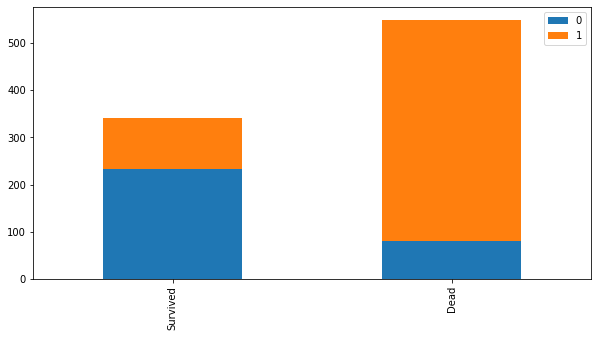

In [25]:

bar_chart('Sex')

# The Chart confirms Women more likely survivied than Men

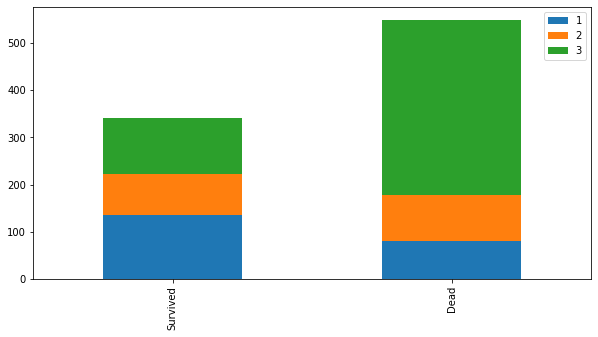

In [26]:
bar_chart('Pclass')


# The Chart confirms 1st class more likely survivied than other classes
The Chart confirms 3rd class more likely dead than other classes